In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [3]:
df = pd.read_csv('.\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


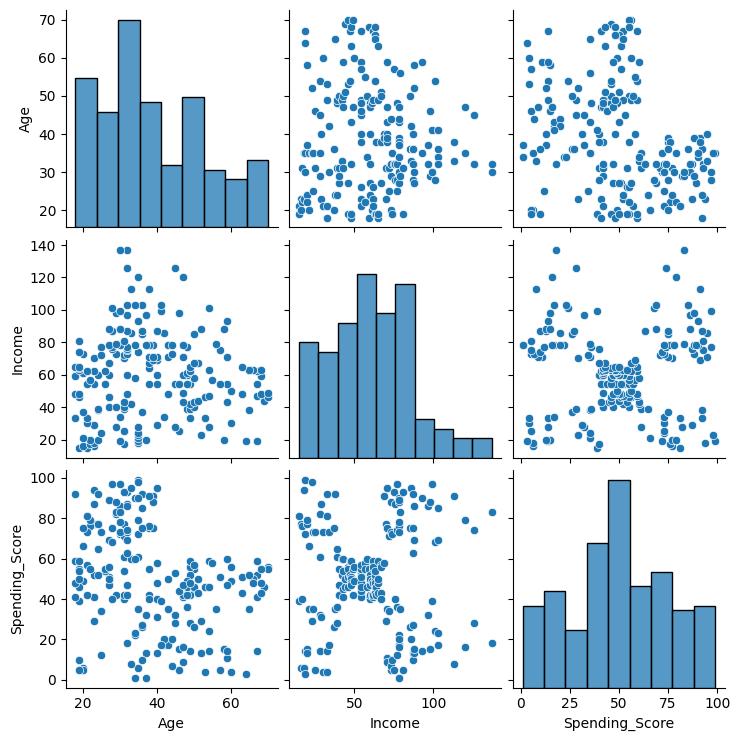

In [6]:
#Plot Age, Income and Spending Score Correlation
sns.pairplot(df[['Age','Income', 'Spending_Score']])

In [ ]:
# Perform K-Mean Clustering with 5 Clusters

In [8]:
import sklearn.cluster as cluster
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
kmeans.cluster_centers_

array([[17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [49.51851852, 55.2962963 ],
       [20.91304348, 26.30434783],
       [82.12820513, 86.53846154]])

In [10]:
# Attach Clusters to the Original Data
df['Clusters'] = kmeans.labels_

In [11]:
df.head()

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [12]:
df['Clusters'].value_counts()

Clusters
2    81
4    39
0    35
3    23
1    22
Name: count, dtype: int64

<Axes: xlabel='Spending_Score', ylabel='Income'>

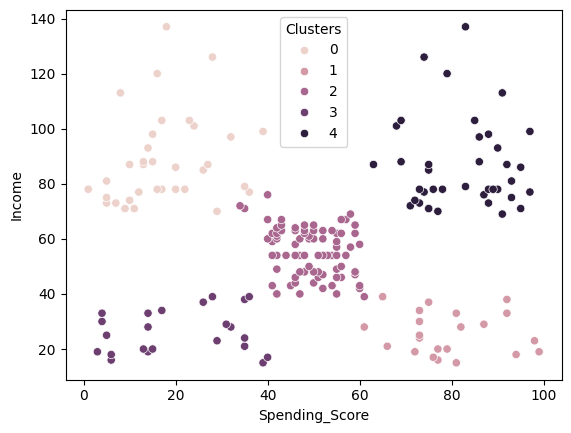

In [13]:
# Plot Cluster on Chart/
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)